In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

datos=np.load('fit_exercise.npy')

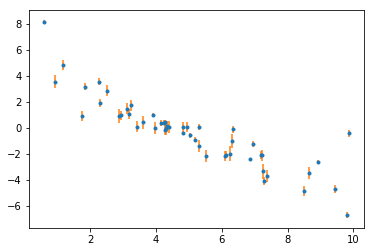

In [3]:
plt.plot(datos[0,:], datos[1,:], 'o', label='Original data', markersize=3)
plt.errorbar(datos[0,:], datos[1,:],yerr= datos[2,:],ls='')
plt.show()
A = np.vstack([datos[0,:], np.ones(len(datos[0,:]))]).T

# MCMC Metropolis

# Usando prior Jeffrey-Jaynes

In [23]:
#definimos los parámetros iniciales y los valores de la la desviación estandar
theta=[-1,4.5,0.05]

x=datos[0]
y=datos[1]
nuevo=np.zeros(3)
post=[theta]

#definimos un prior que está dado por la combinación del prior de jeffrey y el trabajo de Jaynes
#https://bayes.wustl.edu/etj/articles/leapz.pdf
def log_prior(theta):
    alpha, beta, sigma = theta
    if sigma < 0:
        return -np.inf  # log(0)
    else:
        return -1.5 * np.log(1 + beta ** 2) - np.log(sigma)


#definimos el likelihood para una recta con sigma fija
def log_likelihood(theta, x, y):
    alpha, beta, sigma = theta
    y_model = alpha + beta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

#calculamos el posterior con el prior Jeffrey-Jaynes
def log_posterior(theta, x, y):
    return log_prior(theta) + log_likelihood(theta, x, y)


#realizamos el proceso de sampleo para modificar nuestro parámetro
def sampleo(theta, x, y):
    
    #calculamos las propuestas de los parámetros de la recta de manera aleatoria
    nuevo[0]=  np.random.normal(theta[0], theta[2])
    nuevo[1]=  np.random.normal(theta[1], theta[2])
    nuevo[2]=theta[2]

    #calculamos el posterior para el caso anterior y el nuevo (aleatorio)
    p_current = -log_posterior(theta,x,y)
    p_proposal = -log_posterior(nuevo,x,y)


    #si es mayor el nuevo posterior lo aceptamos
    if p_proposal>p_current:

            theta= nuevo
    
    #si no es mayor comparamos la división del posterior nuevo con el anterior con un número al azar entre cero y 1, si es mayor 
    #lo aceptamos       
    else:

            p_accept = p_proposal / p_current
            accept = np.random.rand() 

            if accept< p_accept:
            # Update position
                theta= nuevo
   
    return theta




[-1.    4.5   0.05]
[-1.00445375  4.48317516  0.05      ]
[-1.0060256   4.48277004  0.05      ]
[-1.00597744  4.4775685   0.05      ]
[-0.96222675  4.52857616  0.05      ]
[-1.04821682  4.55064457  0.05      ]
[-0.94927578  4.38492267  0.05      ]
[-1.05811469  4.54662608  0.05      ]
[-1.0272963   4.53820224  0.05      ]
[-1.02599474  4.51929968  0.05      ]
[-1.00726235  4.53683898  0.05      ]
[-0.88298695  4.48822077  0.05      ]


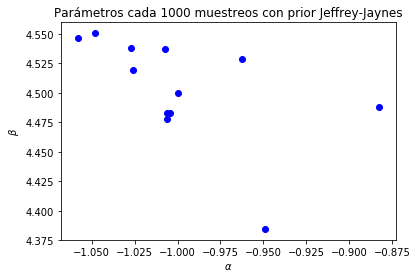

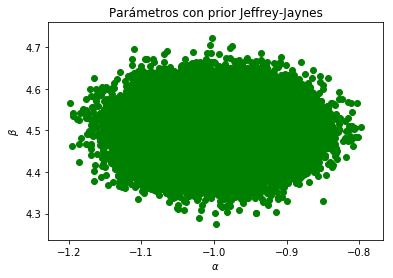

pendiente -0.999595396738071
ordenada al origen 4.500302897430237


In [35]:
#hacemos el muestreo el número de veces que dice el ciclo
for i in range(10000):
    post=np.append(post,[sampleo(theta,x,y)],axis=0)
    if i%900==0:
        #graficamos cada multiplo de 900 e imprimimos para ver a grandes razgos el avance 
        plt.scatter(post[i,0],post[i,1], c='b')
        print(post[i])
plt.title('Parámetros cada 1000 muestreos con prior Jeffrey-Jaynes')
plt.ylabel('$\\beta$')
plt.xlabel('$\\alpha$')
plt.show()

#graficamos los resultados de los parámetros
plt.title('Parámetros con prior Jeffrey-Jaynes')
plt.ylabel('$\\beta$')
plt.xlabel('$\\alpha$')
plt.scatter(post[:,0],post[:,1], c='g')
plt.show()

#imprimimos la media de los resultados de los parámetros
print('pendiente '+str(np.mean(post[:,0])))
print('ordenada al origen '+str(np.mean(post[:,1])))



# Usando prior Gaussiana de 2D

In [37]:
#definimos los parámetros iniciales y los valores de la la desviación estandar
theta=[-1,4.5,0.05,0.03]
theta0=theta

#definimos un prior que está dado por dos gaussianas, una para cada parámetro
def ln_prior(theta):
        alpha, beta, sigma_1, sigma_2 = theta 
        ln_prior_val = 0. 
    
        # la gausiana está centrada en el punto del parámetro y con una sigma fija
        ln_prior_val += -0.5*(alpha - theta0[0])**2/sigma_1**2 
        
        # la gausiana está centrada en el punto del parámetro y con una sigma fija
        ln_prior_val += -0.5*(beta - theta0[1])**2/sigma_2**2 

        return ln_prior_val

x=datos[0]
y=datos[1]
nuevo=np.zeros(4)
post=[theta]

#definimos el likelihood para una recta, por simplicidad usamos una de las sigmas ya definidas previamente 
def log_likelihood(theta, x, y):
    alpha, beta, sigma_1, sigma_2 = theta
    y_model = alpha + beta * x
    return -0.5 * np.sum(np.log(2 * np.pi * sigma_2 ** 2) + (y - y_model) ** 2 / sigma_2 ** 2)

#calculamos el posterior con el prior gaussiano
def log_posterior_2(theta, x, y):
    return ln_prior(theta) + log_likelihood(theta, x, y)


#realizamos el proceso de sampleo para modificar nuestro parámetro
def sampleo_2(theta, x, y):
    
    #calculamos las propuestas de los parámetros de la recta de manera aleatoria
    nuevo[0]=  np.random.normal(theta[0], theta[2])
    nuevo[1]=  np.random.normal(theta[1], theta[2])
    nuevo[2]=  theta[2]
    nuevo[3]=theta[3]

    #calculamos el posterior para el caso anterior y el nuevo (aleatorio)
    p_current = -log_posterior_2(theta,x,y)
    p_proposal = -log_posterior_2(nuevo,x,y)


    #si es mayor el nuevo posterior lo aceptamos
    if p_proposal>p_current:

            theta= nuevo
            
    #si no es mayor comparamos la división del posterior nuevo con el anterior con un número al azar entre cero y 1, si es mayor 
    #lo aceptamos
    else:

            p_accept = p_proposal / p_current
            accept = np.random.rand() 

            if accept< p_accept:
                theta= nuevo
   
    return theta


[-1.    4.5   0.05  0.03]
[-0.97394525  4.58671272  0.05        0.03      ]
[-0.93459185  4.50819665  0.05        0.03      ]
[-1.03361628  4.39687031  0.05        0.03      ]
[-1.01516087  4.51254648  0.05        0.03      ]
[-1.02098342  4.52868637  0.05        0.03      ]
[-0.99733843  4.45866374  0.05        0.03      ]
[-0.96122907  4.47958337  0.05        0.03      ]
[-1.0398837   4.52209952  0.05        0.03      ]
[-1.02025255  4.50511802  0.05        0.03      ]
[-1.03244286  4.50445031  0.05        0.03      ]
[-0.99675109  4.55462523  0.05        0.03      ]


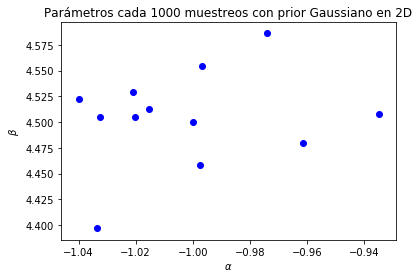

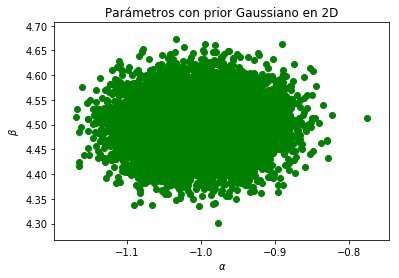

pendiente -1.0009889917497437
ordenada al origen 4.501424651075359


In [38]:

#hacemos el muestreo el número de veces que dice el ciclo
for i in range(10000):
    post=np.append(post,[sampleo_2(theta,x,y)],axis=0)
    #graficamos cada multiplo de 900 e imprimimos para ver a grandes razgos el avance 
    if i%900==0:
        print(post[i])
        plt.scatter(post[i,0],post[i,1], c='b')
plt.title('Parámetros cada 1000 muestreos con prior Gaussiano en 2D')
plt.ylabel('$\\beta$')
plt.xlabel('$\\alpha$')
plt.show()

#graficamos los resultados de los parámetros
plt.scatter(post[:,0],post[:,1], c='g')
plt.title('Parámetros con prior Gaussiano en 2D')
plt.ylabel('$\\beta$')
plt.xlabel('$\\alpha$')
plt.show()

#imprimimos la media de los resultados de los parámetros
print('pendiente '+str(np.mean(post[:,0])))
print('ordenada al origen '+str(np.mean(post[:,1])))